<a href="https://colab.research.google.com/github/samaira23/emergency-detection--first-responders-ai/blob/main/solution_chall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Configuration

Simple data preprocessing
Steps: the kagglehub c2a dataset is already annotated in yolo format. So our objective is simply to download it and bring it into the content folder for the training & create the training.yaml file

In [ ]:
from IPython.display import Image
def display_image(image_path: str):
  return Image(filename=image_path)

In [ ]:
import kagglehub

download_dir = kagglehub.dataset_download("rgbnihal/c2a-dataset")

print("Path to dataset files:", download_dir)

100%|██████████| 4.57G/4.57G [00:45<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rgbnihal/c2a-dataset/versions/2


In [ ]:
!mv /root/.cache/kagglehub/datasets/rgbnihal/c2a-dataset/versions/2 /content/

In [ ]:
content = """train: /content/2/C2A_Dataset/new_dataset3/train/images
val: /content/2/C2A_Dataset/new_dataset3/val/images

names:
  0: human"""

with open('/content/data.yaml', mode='w') as file:
  file.write(content)

with open('/content/data.yaml', mode='r') as file:
  contents = [i for i in file.readlines()]
  for i in contents:
    print(contents)

['train: /content/2/C2A_Dataset/new_dataset3/train/images\n', 'val: /content/2/C2A_Dataset/new_dataset3/val/images\n', '\n', 'names:\n', '  0: human']
['train: /content/2/C2A_Dataset/new_dataset3/train/images\n', 'val: /content/2/C2A_Dataset/new_dataset3/val/images\n', '\n', 'names:\n', '  0: human']
['train: /content/2/C2A_Dataset/new_dataset3/train/images\n', 'val: /content/2/C2A_Dataset/new_dataset3/val/images\n', '\n', 'names:\n', '  0: human']
['train: /content/2/C2A_Dataset/new_dataset3/train/images\n', 'val: /content/2/C2A_Dataset/new_dataset3/val/images\n', '\n', 'names:\n', '  0: human']
['train: /content/2/C2A_Dataset/new_dataset3/train/images\n', 'val: /content/2/C2A_Dataset/new_dataset3/val/images\n', '\n', 'names:\n', '  0: human']


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.7/112.6 GB disk)


In [ ]:
!yolo task=detect mode=train model=/content/yolov8m.pt data=/content/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8m.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

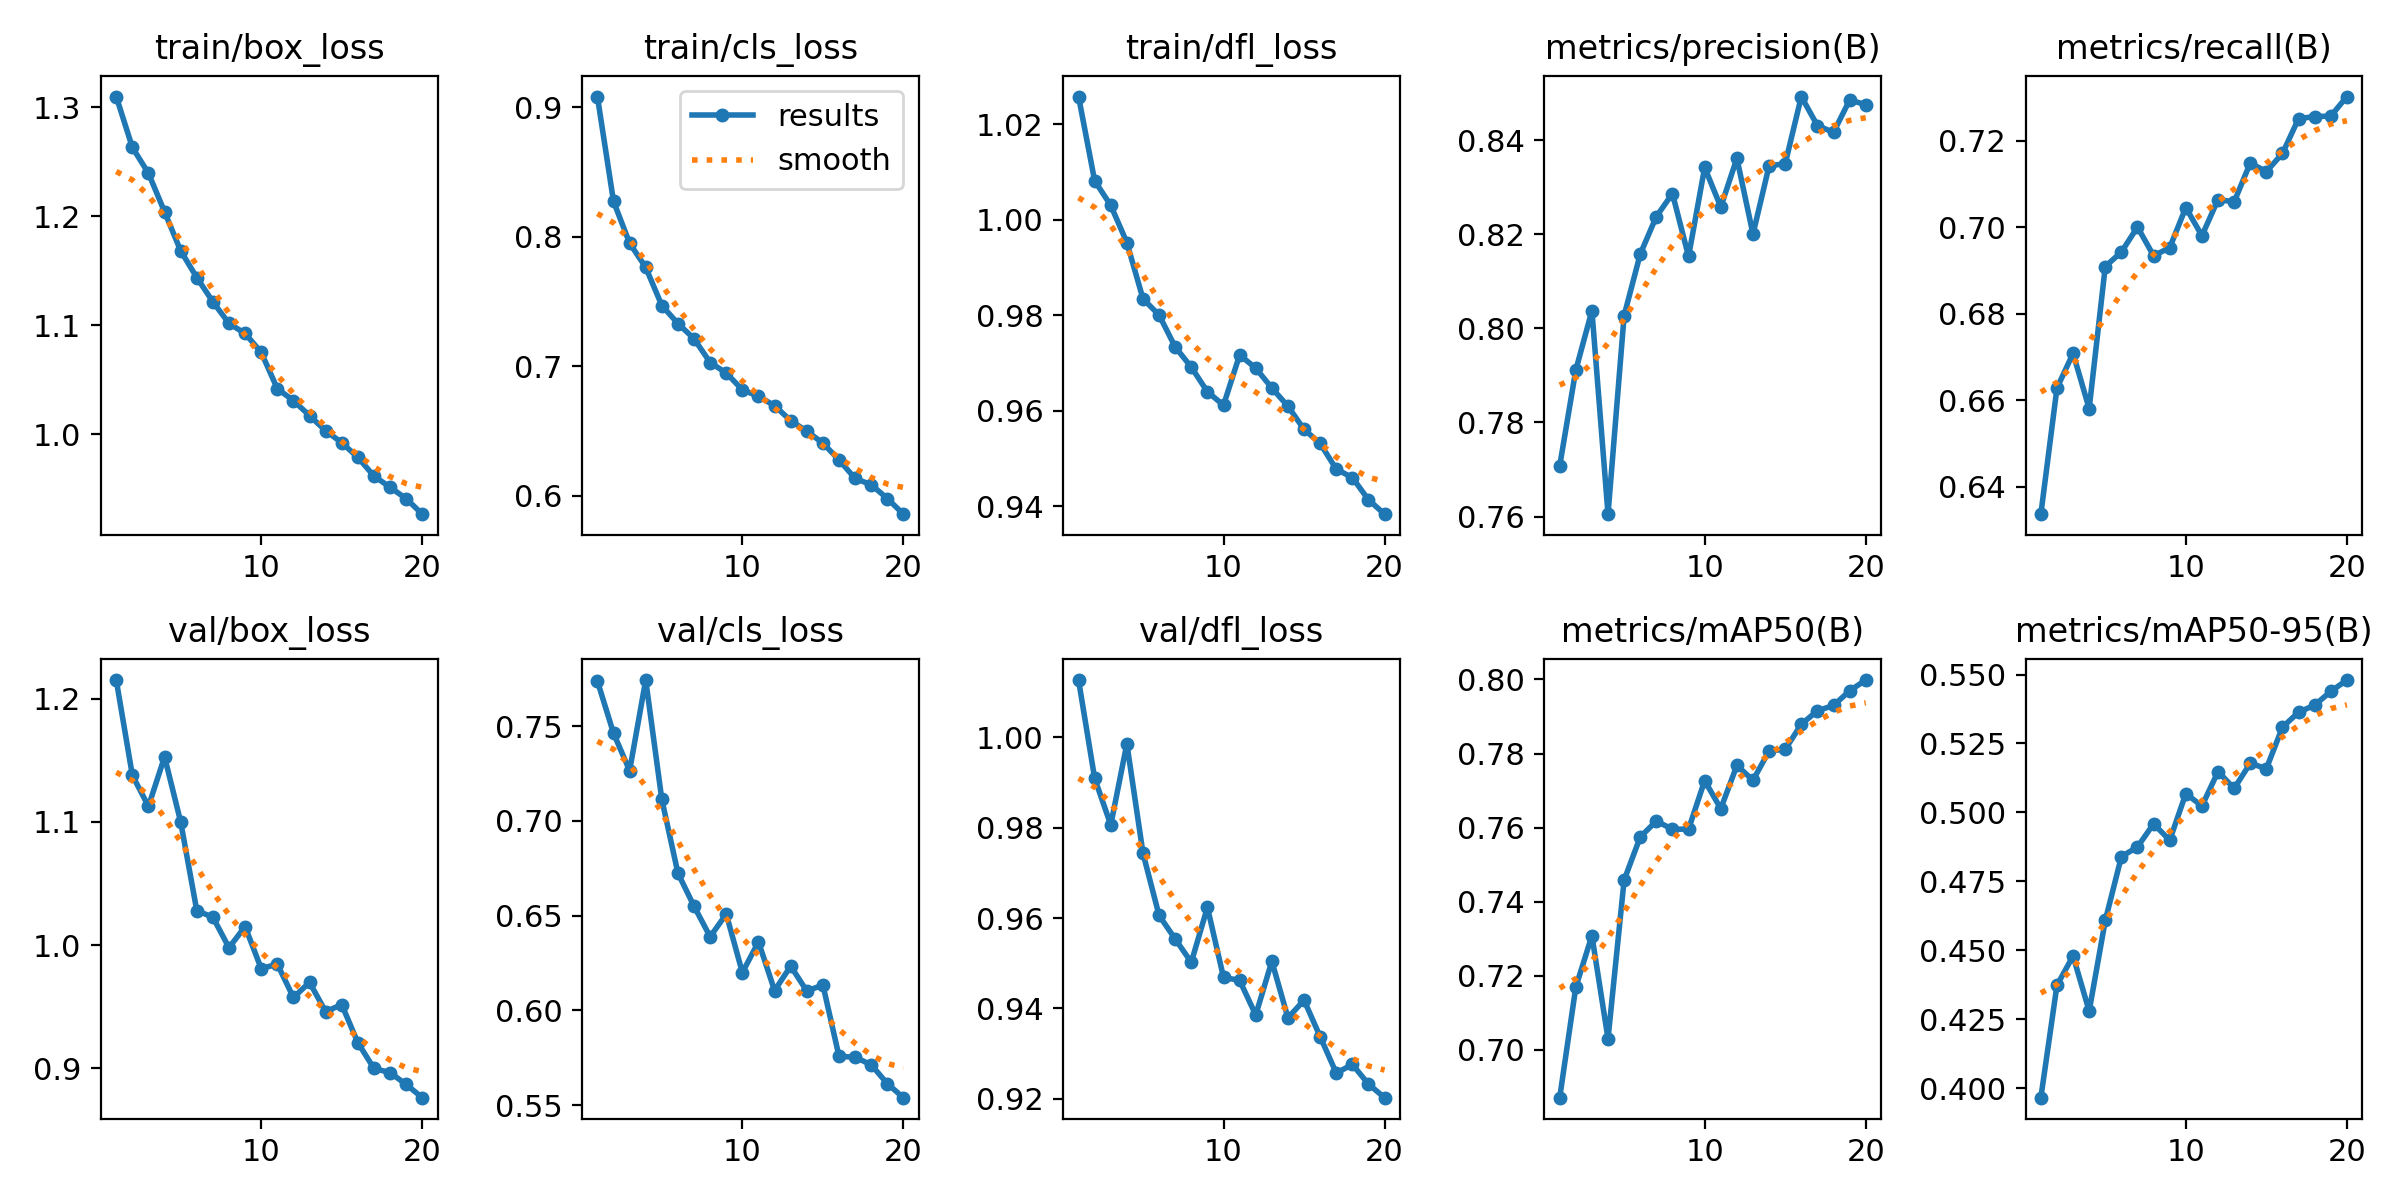

In [ ]:
display_image('/content/runs/detect/train/results.png')

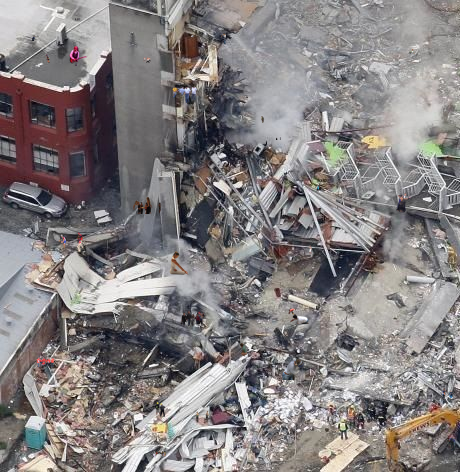

In [ ]:
# Raw image
display_image('/content/2/C2A_Dataset/new_dataset3/test/images/collapsed_building_image0072_1.png')

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/2/C2A_Dataset/new_dataset3/test/images/collapsed_building_image0072_1.png

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/2/C2A_Dataset/new_dataset3/test/images/collapsed_building_image0072_1.png: 640x640 29 humans, 37.1ms
Speed: 7.9ms preprocess, 37.1ms inference, 164.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


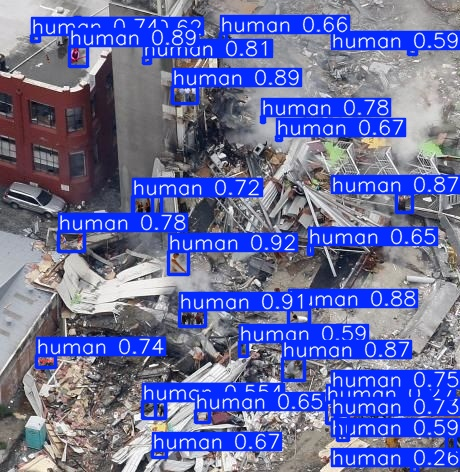

In [ ]:
display_image('/content/runs/detect/predict2/collapsed_building_image0072_1.jpg')